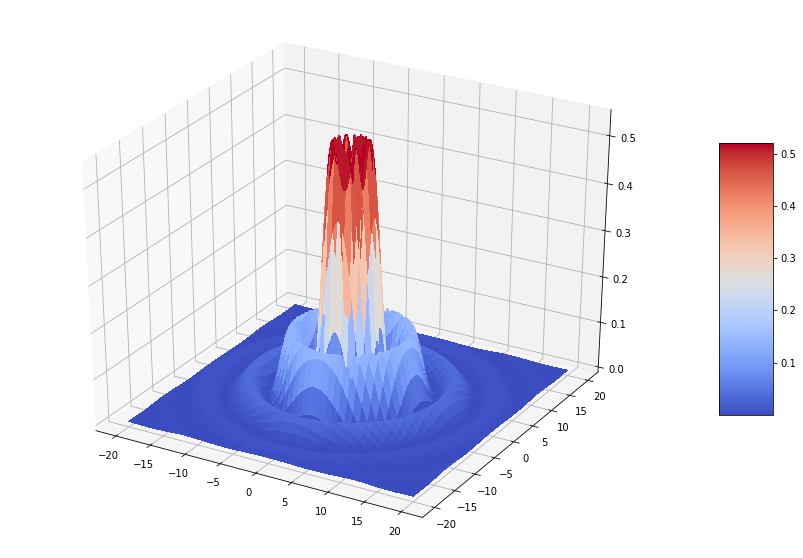

In [65]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')

def f(X,Y):
    R = np.sqrt(X**2 + Y**2)
    sin = np.sin(R*0.6)**2 * (np.ones_like(R)*np.e)**(-R/4)
    return(sin)

X = np.arange(-20,20, 0.05)
Y = np.arange(-20, 20, 0.05)

X, Y = np.meshgrid(X, Y)

Z = f(X,Y)


# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

1129


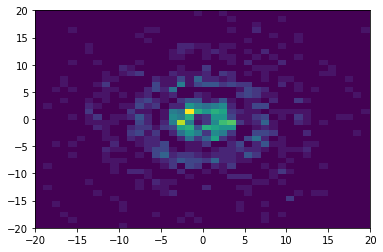

[97826.93997713 12894.9591158   2942.15041854  1561.445848
  -431.58723314]


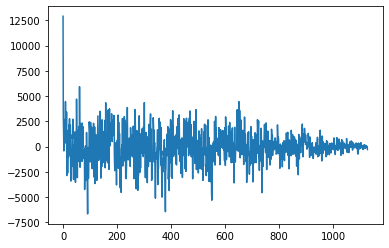

In [108]:
samples = []
k = 0
x0 = np.array([0.1,0.1])
for i in range(100000):
    x = np.random.multivariate_normal(x0,[[5,0],[0,5]],1)[0]
    alpha = f(x[0],x[1])/f(x0[0],x0[1])
    rand = np.random.uniform()
    if(alpha>rand):
        if(i > 1000 and k % 50 == 0):
            samples.append(x)
        k += 1
        x0 = x
        
print(len(samples))

s = np.array(samples)
plt.hist2d(s[:,0],s[:,1],bins = 40, range=[[-20,20],[-20,20]])
plt.show()

def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size//2:]

corr = autocorr(s[:,0]) + autocorr(s[:,1])

print(corr[:5])
plt.plot(corr[1:])
plt.show()
